In [397]:
from sklearn.datasets import load_digits
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
from pennylane import numpy as np
import pennylane as qml
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import MaxAbsScaler 
from sklearn.preprocessing import Normalizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix as confusion_matrix
from sklearn.metrics import f1_score as f1
from sklearn.metrics import recall_score as recall
from sklearn.decomposition import PCA 
from qiskit import *
import seaborn as sns
import plotly.express as px
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
import pennylane as qml
from pennylane import numpy as np
from pennylane.optimize import AdamOptimizer, GradientDescentOptimizer
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt


In [398]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()


In [399]:
print(x_train.shape)


(60000, 28, 28)


In [400]:

number_of_data_points = 10000
y = pd.DataFrame(y_train[0:number_of_data_points])


In [401]:

x_data = pd.DataFrame()
for i in range(number_of_data_points):
    x=x_train[i]
    
    new_x = pd.DataFrame()
    for j in range(len(x[0])):
        new_val = pd.Series()
        new_val= pd.concat([new_val,pd.Series(x[j])])


        new_x= pd.concat([new_x,(new_val.to_frame().T)],axis=1,ignore_index= True)
    x_data = pd.concat([x_data,new_x],ignore_index=False,axis = 0)

copyOfx = x_data
copyOfy = y

In [402]:
print(y)

      0
0     9
1     0
2     0
3     3
4     0
...  ..
9995  7
9996  5
9997  0
9998  6
9999  6

[10000 rows x 1 columns]


In [403]:
print(x_data.shape)

(10000, 784)


In [404]:
class_no = 8
target_class = 1
x_1class = pd.DataFrame()
y_1class = pd.DataFrame()

for i in range( number_of_data_points):
    
    if(y.iloc[i,0] == class_no or y.iloc[i,0] == target_class ):
        
        y_1class = pd.concat([y_1class,y.iloc[i]],ignore_index=False)
        x_1class= pd.concat([x_1class,x_data.iloc[i-1:i]],ignore_index=False)
 

x_data= x_1class
y=y_1class
y = y.astype('int64')


In [405]:
print(y)

    0
0   1
0   1
0   8
0   8
0   1
.. ..
0   1
0   1
0   1
0   8
0   1

[2017 rows x 1 columns]


In [406]:


scaler = MaxAbsScaler() 

x_data = scaler.fit_transform(x_data)

normalizer = Normalizer().fit(x_data)


normalizer.transform(x_data)


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [407]:
pca = PCA(n_components = 3 ) 
 
 
 
xs_data = pca.fit_transform(x_data) 
 

In [408]:

y_new = y.replace([class_no],0)


In [409]:
y = y_new

In [410]:

x_train, x_test, y_train, y_test = train_test_split(xs_data, y, train_size = 0.8)

x_traindf = pd.DataFrame(x_train)
x_testdf = pd.DataFrame(x_test)
y_traindf = pd.DataFrame(y_train)
y_testdf = pd.DataFrame(y_test)

x_test =np.array(x_test)
x_train = np.array(x_train)
y_train = np.array(y_train)
y_test = np.array(y_test)


#y_test=y_test.transpose()[0]
ylist = []
y_train = y_train.transpose()
for i in range(len(y_train)):
    
    ylist.append(y_train[i])


y_train = np.array(ylist,requires_grad=False)
y_train=y_train[0]

ylist = []
y_test = y_test.transpose()
for i in range(len(y_test)):
    
    ylist.append(y_test[i])


y_test = np.array(ylist,requires_grad=False)
y_test=y_test[0]
xlist = []

for i in range(len(x_train)):
    
    xlist.append(x_train[i])


x_train = np.array(xlist,requires_grad=False)

X_train = x_train
X_test =x_test


In [411]:
print(y_test)

[0 1 1 0 1 0 1 1 0 1 1 0 1 1 1 1 1 0 0 1 1 0 0 1 0 0 1 0 1 1 1 0 1 0 1 1 0
 1 1 0 0 0 0 1 0 0 1 1 1 1 1 1 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1
 1 0 1 0 1 0 1 0 1 0 1 0 0 0 1 1 1 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 1 1
 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0
 0 0 0 1 0 1 1 0 1 1 1 1 0 1 0 1 0 0 1 0 1 1 1 1 0 1 1 0 1 0 0 0 0 0 1 0 1
 1 0 1 1 0 1 0 1 0 1 0 1 1 0 0 0 0 0 0 1 0 1 1 1 0 1 1 0 1 1 1 0 1 0 0 1 0
 1 1 1 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 0 1 0 0 0 1 1 0 1 0 1 1
 0 1 0 1 0 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1 0 0 1 0 1 1 0 1 1 0 0
 1 0 1 0 0 1 1 1 1 0 0 0 0 0 1 1 1 0 0 1 0 1 1 1 1 0 0 1 1 1 1 0 1 1 0 0 1
 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 1 0 1 0 0 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1
 1 1 0 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 0 0 0 1 1 1 1 1 1 0 0 0 1 0 1 1]


In [412]:

print(X_test.shape)
print(y_test.shape)
print(x_train.shape)
print(y_train.shape)

(404, 3)
(404,)
(1613, 3)
(1613,)


In [413]:

X_train = x_train
X_test =x_test
print(x_test)


[[ 3.96567368 -3.31069978  1.47224897]
 [-5.55179294  2.47156538 -0.1472932 ]
 [ 6.68776087  5.18804244 -1.88602966]
 ...
 [ 6.39493535 -3.16310155  2.84734542]
 [ 0.66111018 -5.88244304  1.94833489]
 [ 4.90521391  2.49290129 -3.49152608]]


In [414]:
dev = qml.device("lightning.qubit", wires=1)
@qml.qnode(dev)
def qcircuit(params, x, y):

    for p in params:
        qml.Rot(*x, wires=0)
        qml.Rot(*p, wires=0)
    return qml.expval(qml.Hermitian(y, wires=[0]))



In [415]:

class Reuploader():
    
    num_layers =0
    learning_rate=0
    epochs=0 
    batch_size=0
    model = np.array
    opt = 0
    dev=0
    params=0
    state_labels =0
    label_0 = [[1], [0]]
    label_1 = [[0], [1]]
    
   

    def __init__(self,dev,num_layers = 4, learning_rate = 0.6, epochs= 10, batch_size = 32, ):

        self.num_layers = num_layers
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.batch_size = batch_size
        self.opt = AdamOptimizer(learning_rate, beta1=0.9, beta2=0.999)
        self.dev = dev 
        self.params = np.random.uniform(size=(num_layers, 3), requires_grad=True)
        self.state_labels = np.array([self.label_0, self.label_1], requires_grad=False)
        

    
    def density_matrix(self,state):
        """Calculates the density matrix representation of a state.

        Args:
            state (array[complex]): array representing a quantum state vector

        Returns:
            dm: (array[complex]): array representing the density matrix
        """
        return state * np.conj(state).T






    def cost(self, params, x, y, state_labels=None):
        """Cost function to be minimized.

        Args:
            params (array[float]): array of parameters
            x (array[float]): 2-d array of input vectors
            y (array[float]): 1-d array of targets
            state_labels (array[float]): array of state representations for labels

        Returns:
            float: loss value to be minimized
        """
        # Compute prediction for each input in data batch
        loss = 0.0
        dm_labels = [self.density_matrix(s) for s in state_labels]
        for i in range(len(x)):
            f = qcircuit(params, x[i], dm_labels[y[i]])
            loss = loss + (1 - f) ** 2
        return loss / len(x)

    def test(self,params, x, y, state_labels=None):
        """
        Tests on a given set of data.

        Args:
            params (array[float]): array of parameters
            x (array[float]): 2-d array of input vectors
            y (array[float]): 1-d array of targets
            state_labels (array[float]): 1-d array of state representations for labels

        Returns:
            predicted (array([int]): predicted labels for test data
            output_states (array[float]): output quantum states from the circuit
        """
        fidelity_values = []
        dm_labels = [self.density_matrix(s) for s in state_labels]
        predicted = []

        for i in range(len(x)):
            fidel_function = lambda y: qcircuit(params, x[i], y)
            fidelities = [fidel_function(dm) for dm in dm_labels]
            best_fidel = np.argmax(fidelities)

            predicted.append(best_fidel)
            fidelity_values.append(fidelities)

        return np.array(predicted), np.array(fidelity_values)


    def accuracy_score(self,y_true, y_pred):
        """Accuracy score.

        Args:
            y_true (array[float]): 1-d array of targets
            y_predicted (array[float]): 1-d array of predictions
            state_labels (array[float]): 1-d array of state representations for labels

        Returns:
            score (float): the fraction of correctly classified samples
        """
    
        score = y_true == y_pred
        return score.sum() / len(y_true)


    def iterate_minibatches(self, inputs, targets, batch_size):
        """
        A generator for batches of the input data

        Args:
            inputs (array[float]): input data
            targets (array[float]): targets

        Returns:
            inputs (array[float]): one batch of input data of length `batch_size`
            targets (array[float]): one batch of targets of length `batch_size`
        """
        for start_idx in range(0, inputs.shape[0] - batch_size + 1, batch_size):
            idxs = slice(start_idx, start_idx + batch_size)
            yield inputs[idxs], targets[idxs]


    def fit(self,X_train, y_train):

        for it in range(self.epochs):
            for Xbatch, ybatch in self.iterate_minibatches(X_train, y_train, batch_size=self.batch_size):
                self.params, _, _, _ = self.opt.step(self.cost, self.params, Xbatch, ybatch, self.state_labels)

            predicted_train, fidel_train = self.test(self.params, X_train, y_train, self.state_labels)
            accuracy_train = self.accuracy_score(y_train, predicted_train)
            loss = self.cost(self.params, X_train, y_train, self.state_labels)
            

            res = [it + 1, loss, accuracy_train]
            print(
                "Epoch: {:2d} | Loss: {:3f} |  accuracy: {:3f} ".format(
                    *res
                )
            )
    def predict(self,X_test, y_test):

        predicted_test, fidel_test = self.test(self.params, X_test, y_test, self.state_labels)

        return predicted_test



    

    


In [416]:


model = Reuploader( dev, num_layers=2)

model.fit(X_train, y_train)


Epoch:  1 | Loss: 0.332030 |  accuracy: 0.500930 
Epoch:  2 | Loss: 0.320527 |  accuracy: 0.520769 
Epoch:  3 | Loss: 0.308942 |  accuracy: 0.486671 
Epoch:  4 | Loss: 0.313154 |  accuracy: 0.515809 
Epoch:  5 | Loss: 0.310239 |  accuracy: 0.499070 
Epoch:  6 | Loss: 0.301399 |  accuracy: 0.510229 
Epoch:  7 | Loss: 0.307623 |  accuracy: 0.508989 
Epoch:  8 | Loss: 0.309122 |  accuracy: 0.506510 
Epoch:  9 | Loss: 0.324283 |  accuracy: 0.508369 
Epoch: 10 | Loss: 0.304005 |  accuracy: 0.508369 


In [417]:
y_pred = model.predict(x_test,y_test)

In [418]:
px.scatter_3d(x=x_testdf.iloc[:,0],y=x_testdf.iloc[:,1],z=x_testdf.iloc[:,2], color= y_test)

In [419]:
px.scatter_3d(x=x_testdf.iloc[:,0],y=x_testdf.iloc[:,1],z=x_testdf.iloc[:,2], color= y_pred)

Recall(TP/FN+TP ):0.43601895734597157
Precsion(TP/FP+TP): 0.4842105263157895 
F1 score function of presscion and recall:0.45885286783042395 


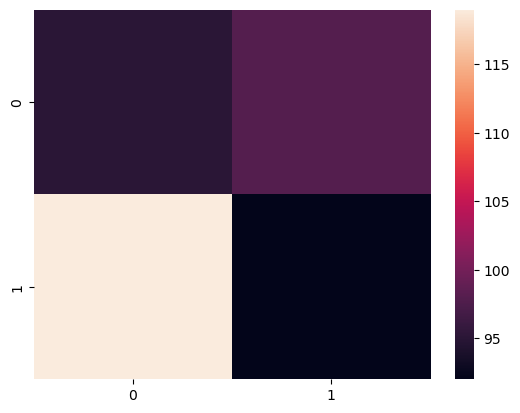

In [420]:
conMtx = confusion_matrix(y_test,y_pred)
sns.heatmap(conMtx)
f1 = f1_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
pre = precision_score(y_test,y_pred)

print(f"Recall(TP/FN+TP ):{recall}")
print(f"Precsion(TP/FP+TP): {pre} ")
print(f"F1 score function of presscion and recall:{f1} ")

5
 Training QDT no : 1
Epoch:  1 | Loss: 0.320929 |  accuracy: 0.496894 
Epoch:  2 | Loss: 0.292106 |  accuracy: 0.518634 
Epoch:  3 | Loss: 0.287766 |  accuracy: 0.571429 
Epoch:  4 | Loss: 0.293640 |  accuracy: 0.527950 
Epoch:  5 | Loss: 0.288354 |  accuracy: 0.537267 
Epoch:  6 | Loss: 0.295245 |  accuracy: 0.540373 
Epoch:  7 | Loss: 0.288751 |  accuracy: 0.540373 
Epoch:  8 | Loss: 0.300453 |  accuracy: 0.512422 
Epoch:  9 | Loss: 0.295321 |  accuracy: 0.552795 
Epoch: 10 | Loss: 0.280793 |  accuracy: 0.552795 
 Training QDT no : 2
Epoch:  1 | Loss: 0.315767 |  accuracy: 0.524845 
Epoch:  2 | Loss: 0.302626 |  accuracy: 0.559006 
Epoch:  3 | Loss: 0.294119 |  accuracy: 0.577640 
Epoch:  4 | Loss: 0.287688 |  accuracy: 0.509317 
Epoch:  5 | Loss: 0.296786 |  accuracy: 0.534161 
Epoch:  6 | Loss: 0.273341 |  accuracy: 0.552795 
Epoch:  7 | Loss: 0.314447 |  accuracy: 0.540373 
Epoch:  8 | Loss: 0.272460 |  accuracy: 0.549689 
Epoch:  9 | Loss: 0.284294 |  accuracy: 0.549689 
Epoch:

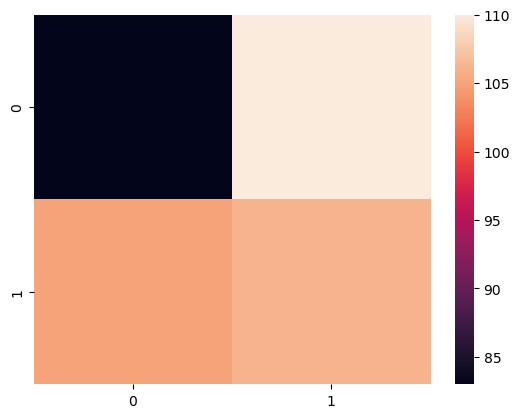

In [421]:
qrf = QRF(X_train,y_train, no_QDT=5, sensetivity= 0.5 ) 

qrf.train()
y_pred,individual_y = qrf.predict(X_test, y_test)
conMtx = confusion_matrix(y_test,y_pred)

sns.heatmap(conMtx)
f1 = f1_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
pre = precision_score(y_test,y_pred)

print(f"Recall(TP/FN+TP ):{recall}")
print(f"Precsion(TP/FP+TP): {pre} ")
print(f"F1 score function of presscion and recall:{f1} ")

In [422]:
model = Reuploader( dev, num_layers=3)

model.fit(x_train, y_train)

Epoch:  1 | Loss: 0.331495 |  accuracy: 0.495970 
Epoch:  2 | Loss: 0.314060 |  accuracy: 0.499690 
Epoch:  3 | Loss: 0.329696 |  accuracy: 0.485431 
Epoch:  4 | Loss: 0.326502 |  accuracy: 0.508369 
Epoch:  5 | Loss: 0.317189 |  accuracy: 0.508989 
Epoch:  6 | Loss: 0.318670 |  accuracy: 0.509609 
Epoch:  7 | Loss: 0.332934 |  accuracy: 0.507130 
Epoch:  8 | Loss: 0.307380 |  accuracy: 0.529448 
Epoch:  9 | Loss: 0.306293 |  accuracy: 0.508369 
Epoch: 10 | Loss: 0.350347 |  accuracy: 0.513329 


In [423]:
model = Reuploader( dev, num_layers=4)

model.fit(X_train, y_train)

Epoch:  1 | Loss: 0.313807 |  accuracy: 0.528828 
Epoch:  2 | Loss: 0.341036 |  accuracy: 0.501550 
Epoch:  3 | Loss: 0.329239 |  accuracy: 0.494730 
Epoch:  4 | Loss: 0.336684 |  accuracy: 0.489771 
Epoch:  5 | Loss: 0.331929 |  accuracy: 0.508989 
Epoch:  6 | Loss: 0.332868 |  accuracy: 0.511469 
Epoch:  7 | Loss: 0.331904 |  accuracy: 0.512089 
Epoch:  8 | Loss: 0.344433 |  accuracy: 0.507130 
Epoch:  9 | Loss: 0.324513 |  accuracy: 0.494110 
Epoch: 10 | Loss: 0.340987 |  accuracy: 0.491631 


In [424]:
model = Reuploader( dev, num_layers=5)

model.fit(X_train, y_train)

Epoch:  1 | Loss: 0.315506 |  accuracy: 0.521389 
Epoch:  2 | Loss: 0.330891 |  accuracy: 0.493490 
Epoch:  3 | Loss: 0.319745 |  accuracy: 0.500310 
Epoch:  4 | Loss: 0.327399 |  accuracy: 0.502170 
Epoch:  5 | Loss: 0.324714 |  accuracy: 0.519529 
Epoch:  6 | Loss: 0.316547 |  accuracy: 0.508989 
Epoch:  7 | Loss: 0.316665 |  accuracy: 0.511469 
Epoch:  8 | Loss: 0.335654 |  accuracy: 0.501550 
Epoch:  9 | Loss: 0.337324 |  accuracy: 0.496590 
Epoch: 10 | Loss: 0.329357 |  accuracy: 0.503410 


In [425]:
y_pred = model.predict(x_test,y_test)

Recall(TP/FN+TP ):0.4976303317535545
Precsion(TP/FP+TP): 0.5223880597014925 
F1 score function of presscion and recall:0.5097087378640777 


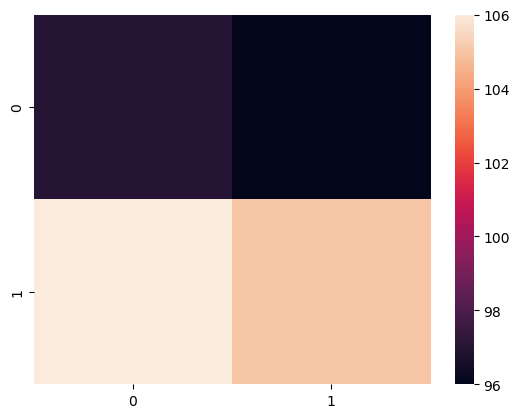

In [426]:
conMtx = confusion_matrix(y_test,y_pred)
sns.heatmap(conMtx)
f1 = f1_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
pre = precision_score(y_test,y_pred)

print(f"Recall(TP/FN+TP ):{recall}")
print(f"Precsion(TP/FP+TP): {pre} ")
print(f"F1 score function of presscion and recall:{f1} ")

In [427]:
px.scatter_3d(x=x_testdf.iloc[:,0],y=x_testdf.iloc[:,1],z=x_testdf.iloc[:,2], color= y_pred)

In [428]:
class QRF:

 
    x_bags = []
    y_bags =[]
    QDT = []
    no_QDT=0
    depth =0
    sensetivity = 0


    def __init__(self, x_train, y_train,  no_QDT, depth =2, sensetivity=0.2 ):

        self.X_train= x_train
        self.y_train= y_train
        self.no_QDT = no_QDT
        self.depth = depth
        self.x_bags = [[] for j in range(no_QDT)]
        self.y_bags = [[] for j in range(no_QDT)]
        self.QDT = []
        self.sensetivity = sensetivity


      


    def Create_Models(self):

        for i in range(self.no_QDT):
            self.QDT.append(Reuploader(dev,self.depth))

    
    def data_bagging(self):

        k=0
        
        for j in range(self.no_QDT):
            x_bags =  []
            y_bags = []
            for i in range(int(len(self.X_train)/self.no_QDT)):
                
                
                x_bags.append(self.X_train[k])
                y_bags.append(self.y_train[k])
                k+=1
            self.x_bags[j] = (x_bags)
            self.y_bags[j] = (y_bags)
            
    
    def train(self):
    
        self.data_bagging()
        self.Create_Models()
        print(self.no_QDT)
        for i in range(len(self.QDT)):
            print(f" Training QDT no : {i+1}")
            self.QDT[i].fit(np.array(self.x_bags[i]),np.array(self.y_bags[i]))
            
    
    def predict(self,x_test,y_test):
        
        individual_results = []
        result = [3 for x in range(len(x_test))]
        sum_of_results = [0 for y in range(len(x_test)) ]
        for i  in range(len(self.QDT)):

            individual_results.append(self.QDT[i].predict(x_test,y_test))
            
           

            sum_of_results = sum_of_results + individual_results[i]
       
        for q in range(len(sum_of_results)):
            

            if sum_of_results[q]/self.no_QDT >= self.sensetivity:
                
                result[q] = 1
            else:
                result[q] = 0
        print(sum_of_results)
                

        
        
        
        return result,individual_results



        




        

    
        

In [429]:
qrf = QRF(x_train,y_train, no_QDT=2, sensetivity=0.5)

qrf.train()


2
 Training QDT no : 1
Epoch:  1 | Loss: 0.335169 |  accuracy: 0.500000 
Epoch:  2 | Loss: 0.324462 |  accuracy: 0.482630 
Epoch:  3 | Loss: 0.315798 |  accuracy: 0.509926 
Epoch:  4 | Loss: 0.332247 |  accuracy: 0.503722 
Epoch:  5 | Loss: 0.322903 |  accuracy: 0.517370 
Epoch:  6 | Loss: 0.303052 |  accuracy: 0.524814 
Epoch:  7 | Loss: 0.331909 |  accuracy: 0.502481 
Epoch:  8 | Loss: 0.329204 |  accuracy: 0.511166 
Epoch:  9 | Loss: 0.371396 |  accuracy: 0.500000 
Epoch: 10 | Loss: 0.310340 |  accuracy: 0.488834 
 Training QDT no : 2
Epoch:  1 | Loss: 0.325451 |  accuracy: 0.488834 
Epoch:  2 | Loss: 0.293899 |  accuracy: 0.516129 
Epoch:  3 | Loss: 0.307615 |  accuracy: 0.490074 
Epoch:  4 | Loss: 0.334604 |  accuracy: 0.470223 
Epoch:  5 | Loss: 0.301811 |  accuracy: 0.518610 
Epoch:  6 | Loss: 0.302377 |  accuracy: 0.514888 
Epoch:  7 | Loss: 0.315500 |  accuracy: 0.506203 
Epoch:  8 | Loss: 0.317030 |  accuracy: 0.507444 
Epoch:  9 | Loss: 0.312879 |  accuracy: 0.522333 
Epoch:

In [430]:

y_pred,y_ind = qrf.predict(X_test, y_test)


[2 1 1 1 1 1 1 2 1 1 2 1 2 1 1 2 2 2 2 1 0 2 2 0 1 1 0 0 0 2 2 2 2 2 1 2 2
 0 2 0 0 1 2 1 2 1 0 2 2 1 1 0 2 2 1 2 2 1 1 1 0 1 2 1 2 1 0 1 2 1 1 1 1 0
 1 1 1 2 1 1 0 1 2 2 0 1 2 2 0 1 1 2 0 2 1 0 2 0 1 1 0 0 1 1 1 2 1 2 1 1 2
 0 2 2 1 0 0 2 2 2 1 1 0 1 1 0 1 0 0 2 1 0 2 2 1 0 1 2 2 1 2 0 2 1 2 1 0 1
 1 1 2 1 1 2 2 1 0 1 0 2 1 1 2 1 1 0 1 2 2 1 0 2 2 1 2 1 2 0 1 0 2 1 1 2 1
 1 1 2 1 2 2 1 0 1 0 1 0 0 2 1 0 1 2 2 2 2 0 2 0 0 1 1 1 1 2 0 1 0 2 2 2 1
 2 0 0 2 1 2 1 0 0 2 1 0 2 1 2 2 0 1 1 1 0 2 1 2 2 1 2 2 2 2 2 1 2 1 1 1 2
 1 1 2 0 0 0 1 1 2 0 2 2 0 1 2 1 1 2 2 1 0 2 2 2 1 1 1 2 1 1 0 0 2 0 0 2 1
 0 2 2 0 2 1 2 1 1 2 2 1 0 2 0 0 2 2 1 2 2 1 1 0 2 2 2 0 2 1 1 0 1 2 1 1 2
 1 2 1 1 1 2 0 2 2 2 2 2 1 1 1 2 1 1 2 2 2 2 1 0 0 2 1 2 1 1 1 0 0 2 2 1 2
 1 2 2 0 1 0 2 1 2 1 1 1 2 2 2 1 0 1 0 2 2 1 2 0 2 1 1 1 2 0 2 1 2 2]


Recall(TP/FN+TP ):0.7440758293838863
Precsion(TP/FP+TP): 0.490625 
F1 score function of presscion and recall:0.5913370998116761 


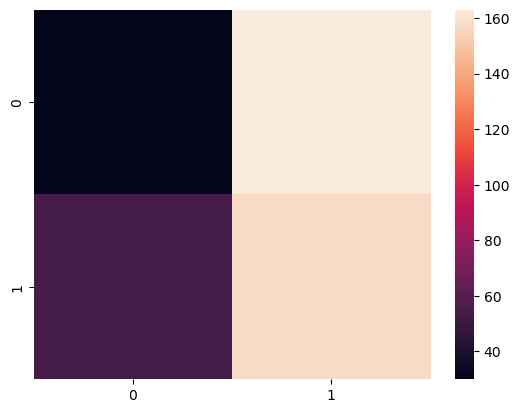

In [431]:
conMtx = confusion_matrix(y_test,y_pred)
sns.heatmap(conMtx)
f1 = f1_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
pre = precision_score(y_test,y_pred)

print(f"Recall(TP/FN+TP ):{recall}")
print(f"Precsion(TP/FP+TP): {pre} ")
print(f"F1 score function of presscion and recall:{f1} ")

In [432]:

px.scatter_3d(x=x_testdf.iloc[:,0],y=x_testdf.iloc[:,1],z=x_testdf.iloc[:,2], color= y_test)

In [433]:
px.scatter_3d(x=x_testdf.iloc[:,0],y=x_testdf.iloc[:,1],z=x_testdf.iloc[:,2], color= y_pred)

3
 Training QDT no : 1
Epoch:  1 | Loss: 0.302649 |  accuracy: 0.521415 
Epoch:  2 | Loss: 0.322208 |  accuracy: 0.500931 
Epoch:  3 | Loss: 0.338308 |  accuracy: 0.510242 
Epoch:  4 | Loss: 0.304354 |  accuracy: 0.489758 
Epoch:  5 | Loss: 0.314449 |  accuracy: 0.527002 
Epoch:  6 | Loss: 0.321431 |  accuracy: 0.525140 
Epoch:  7 | Loss: 0.346837 |  accuracy: 0.486034 
Epoch:  8 | Loss: 0.310306 |  accuracy: 0.527002 
Epoch:  9 | Loss: 0.291378 |  accuracy: 0.532588 
Epoch: 10 | Loss: 0.317846 |  accuracy: 0.517691 
 Training QDT no : 2
Epoch:  1 | Loss: 0.296338 |  accuracy: 0.525140 
Epoch:  2 | Loss: 0.308256 |  accuracy: 0.515829 
Epoch:  3 | Loss: 0.341746 |  accuracy: 0.506518 
Epoch:  4 | Loss: 0.326175 |  accuracy: 0.500931 
Epoch:  5 | Loss: 0.299319 |  accuracy: 0.512104 
Epoch:  6 | Loss: 0.296937 |  accuracy: 0.504655 
Epoch:  7 | Loss: 0.310165 |  accuracy: 0.506518 
Epoch:  8 | Loss: 0.298127 |  accuracy: 0.476723 
Epoch:  9 | Loss: 0.325729 |  accuracy: 0.530726 
Epoch:

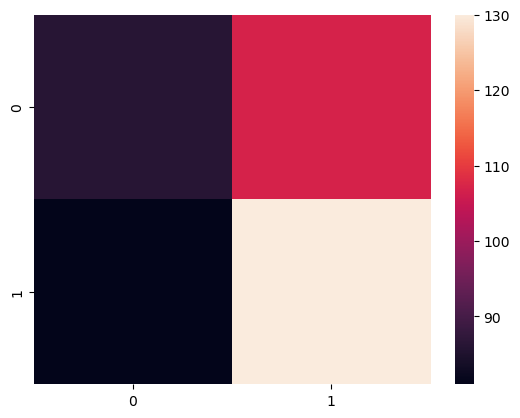

In [434]:
qrf = QRF(X_train,y_train, no_QDT=3, sensetivity=0.5)

qrf.train()
y_pred,individual_y = qrf.predict(X_test, y_test)
conMtx = confusion_matrix(y_test,y_pred)

sns.heatmap(conMtx)
f1 = f1_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
pre = precision_score(y_test,y_pred)

print(f"Recall(TP/FN+TP ):{recall}")
print(f"Precsion(TP/FP+TP): {pre} ")
print(f"F1 score function of presscion and recall:{f1} ")

In [435]:
px.scatter_3d(x=x_testdf.iloc[:,0],y=x_testdf.iloc[:,1],z=x_testdf.iloc[:,2], color= y_pred)

5
 Training QDT no : 1
Epoch:  1 | Loss: 0.314552 |  accuracy: 0.500000 
Epoch:  2 | Loss: 0.303582 |  accuracy: 0.537267 
Epoch:  3 | Loss: 0.297781 |  accuracy: 0.531056 
Epoch:  4 | Loss: 0.280341 |  accuracy: 0.531056 
Epoch:  5 | Loss: 0.296455 |  accuracy: 0.524845 
Epoch:  6 | Loss: 0.285393 |  accuracy: 0.534161 
Epoch:  7 | Loss: 0.284857 |  accuracy: 0.552795 
Epoch:  8 | Loss: 0.277658 |  accuracy: 0.537267 
Epoch:  9 | Loss: 0.299146 |  accuracy: 0.521739 
Epoch: 10 | Loss: 0.281542 |  accuracy: 0.540373 
 Training QDT no : 2
Epoch:  1 | Loss: 0.316271 |  accuracy: 0.493789 
Epoch:  2 | Loss: 0.336865 |  accuracy: 0.531056 
Epoch:  3 | Loss: 0.284934 |  accuracy: 0.524845 
Epoch:  4 | Loss: 0.314261 |  accuracy: 0.518634 
Epoch:  5 | Loss: 0.297315 |  accuracy: 0.518634 
Epoch:  6 | Loss: 0.285926 |  accuracy: 0.562112 
Epoch:  7 | Loss: 0.274736 |  accuracy: 0.534161 
Epoch:  8 | Loss: 0.277963 |  accuracy: 0.552795 
Epoch:  9 | Loss: 0.275334 |  accuracy: 0.531056 
Epoch:

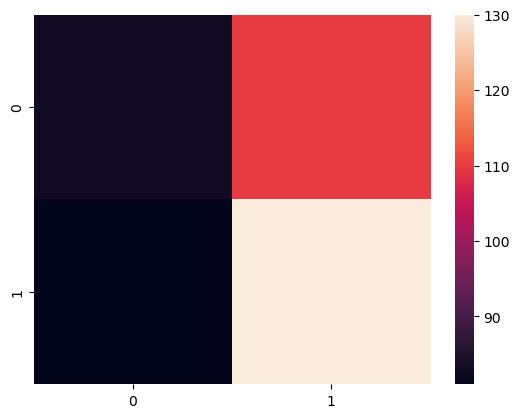

In [436]:
qrf = QRF(X_train,y_train, no_QDT=5, sensetivity= 0.5 ) 

qrf.train()
y_pred,individual_y = qrf.predict(X_test, y_test)
conMtx = confusion_matrix(y_test,y_pred)

sns.heatmap(conMtx)
f1 = f1_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
pre = precision_score(y_test,y_pred)

print(f"Recall(TP/FN+TP ):{recall}")
print(f"Precsion(TP/FP+TP): {pre} ")
print(f"F1 score function of presscion and recall:{f1} ")

In [437]:
px.scatter_3d(x=x_testdf.iloc[:,0],y=x_testdf.iloc[:,1],z=x_testdf.iloc[:,2], color= y_test)

In [438]:
px.scatter_3d(x=x_testdf.iloc[:,0],y=x_testdf.iloc[:,1],z=x_testdf.iloc[:,2], color= y_pred)

10
 Training QDT no : 1
Epoch:  1 | Loss: 0.303965 |  accuracy: 0.503106 
Epoch:  2 | Loss: 0.302989 |  accuracy: 0.496894 
Epoch:  3 | Loss: 0.295772 |  accuracy: 0.496894 
Epoch:  4 | Loss: 0.280570 |  accuracy: 0.559006 
Epoch:  5 | Loss: 0.275749 |  accuracy: 0.552795 
Epoch:  6 | Loss: 0.279402 |  accuracy: 0.577640 
Epoch:  7 | Loss: 0.274380 |  accuracy: 0.565217 
Epoch:  8 | Loss: 0.271646 |  accuracy: 0.602484 
Epoch:  9 | Loss: 0.271614 |  accuracy: 0.571429 
Epoch: 10 | Loss: 0.262110 |  accuracy: 0.608696 
 Training QDT no : 2
Epoch:  1 | Loss: 0.293490 |  accuracy: 0.496894 
Epoch:  2 | Loss: 0.309610 |  accuracy: 0.472050 
Epoch:  3 | Loss: 0.290936 |  accuracy: 0.503106 
Epoch:  4 | Loss: 0.275899 |  accuracy: 0.559006 
Epoch:  5 | Loss: 0.263608 |  accuracy: 0.565217 
Epoch:  6 | Loss: 0.265532 |  accuracy: 0.583851 
Epoch:  7 | Loss: 0.260142 |  accuracy: 0.602484 
Epoch:  8 | Loss: 0.261551 |  accuracy: 0.621118 
Epoch:  9 | Loss: 0.260596 |  accuracy: 0.596273 
Epoch

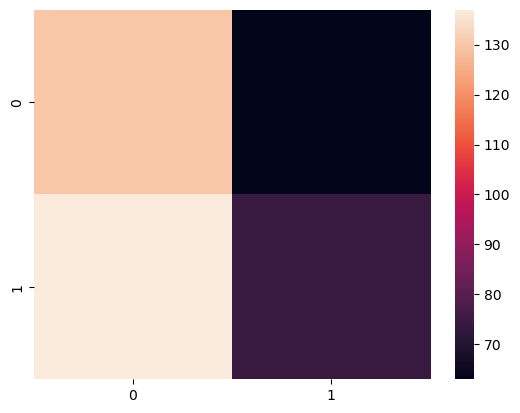

In [439]:
qrf = QRF(X_train,y_train, no_QDT=10, sensetivity=0.6 ) 

qrf.train()

y_pred,individual_y = qrf.predict(X_test, y_test)

conMtx = confusion_matrix(y_test,y_pred)
sns.heatmap(conMtx)
f1 = f1_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
pre = precision_score(y_test,y_pred)

print(f"Recall(TP/FN+TP ):{recall}")
print(f"Precsion(TP/FP+TP): {pre} ")
print(f"F1 score function of presscion and recall:{f1} ")



In [440]:
px.scatter_3d(x=x_testdf.iloc[:,0],y=x_testdf.iloc[:,1],z=x_testdf.iloc[:,2], color= y_pred)

10
 Training QDT no : 1
Epoch:  1 | Loss: 0.323012 |  accuracy: 0.559006 
Epoch:  2 | Loss: 0.353195 |  accuracy: 0.478261 
Epoch:  3 | Loss: 0.294139 |  accuracy: 0.552795 
Epoch:  4 | Loss: 0.274623 |  accuracy: 0.565217 
Epoch:  5 | Loss: 0.248524 |  accuracy: 0.621118 
Epoch:  6 | Loss: 0.268085 |  accuracy: 0.596273 
Epoch:  7 | Loss: 0.254784 |  accuracy: 0.608696 
Epoch:  8 | Loss: 0.246454 |  accuracy: 0.621118 
Epoch:  9 | Loss: 0.230002 |  accuracy: 0.639752 
Epoch: 10 | Loss: 0.231180 |  accuracy: 0.627329 
 Training QDT no : 2
Epoch:  1 | Loss: 0.331723 |  accuracy: 0.527950 
Epoch:  2 | Loss: 0.292068 |  accuracy: 0.552795 
Epoch:  3 | Loss: 0.331267 |  accuracy: 0.465839 
Epoch:  4 | Loss: 0.344608 |  accuracy: 0.503106 
Epoch:  5 | Loss: 0.301650 |  accuracy: 0.590062 
Epoch:  6 | Loss: 0.282550 |  accuracy: 0.540373 
Epoch:  7 | Loss: 0.314943 |  accuracy: 0.534161 
Epoch:  8 | Loss: 0.270731 |  accuracy: 0.608696 
Epoch:  9 | Loss: 0.249314 |  accuracy: 0.677019 
Epoch

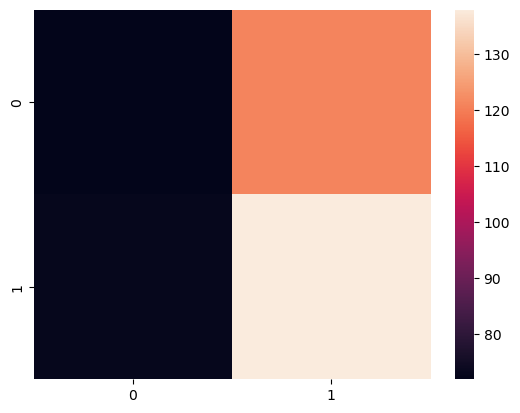

In [441]:
qrf = QRF(X_train,y_train, no_QDT=10,depth=5, sensetivity=0.5 ) 

qrf.train()

y_pred,individual_y = qrf.predict(X_test, y_test)

conMtx = confusion_matrix(y_test,y_pred)
sns.heatmap(conMtx)
f1 = f1_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
pre = precision_score(y_test,y_pred)

print(f"Recall(TP/FN+TP ):{recall}")
print(f"Precsion(TP/FP+TP): {pre} ")
print(f"F1 score function of presscion and recall:{f1} ")


In [442]:
px.scatter_3d(x=x_testdf.iloc[:,0],y=x_testdf.iloc[:,1],z=x_testdf.iloc[:,2], color= y_pred)

Recall(TP/FN+TP ):0.5213270142180095
Precsion(TP/FP+TP): 0.5263157894736842 
F1 score function of presscion and recall:0.5238095238095237 


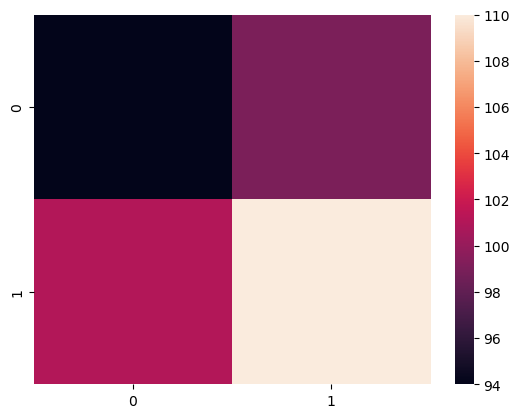

In [443]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(max_depth=2)
model.fit(x_train,y_train)


y_pred = model.predict(X_test)

conMtx = confusion_matrix(y_test,y_pred)
sns.heatmap(conMtx)
f1 = f1_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
pre = precision_score(y_test,y_pred)

print(f"Recall(TP/FN+TP ):{recall}")
print(f"Precsion(TP/FP+TP): {pre} ")
print(f"F1 score function of presscion and recall:{f1} ")


In [444]:
px.scatter_3d(x=x_testdf.iloc[:,0],y=x_testdf.iloc[:,1],z=x_testdf.iloc[:,2], color= y_test)

In [445]:
px.scatter_3d(x=x_testdf.iloc[:,0],y=x_testdf.iloc[:,1],z=x_testdf.iloc[:,2], color= y_pred)

Recall(TP/FN+TP ):0.5355450236966824
Precsion(TP/FP+TP): 0.5458937198067633 
F1 score function of presscion and recall:0.5406698564593301 


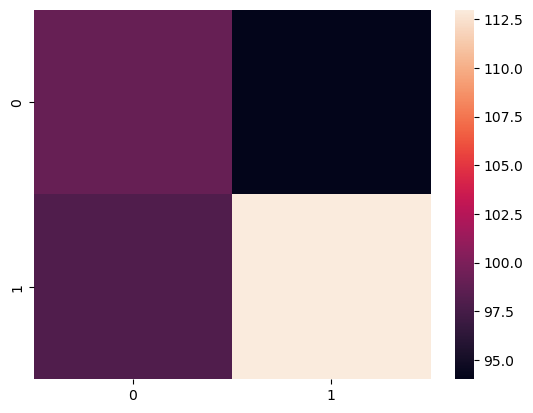

In [446]:
svm = SVC(kernel = 'rbf').fit(x_train, y_train)   

y_pred = svm.predict(X_test)

conMtx = confusion_matrix(y_test,y_pred)
sns.heatmap(conMtx)
f1 = f1_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
pre = precision_score(y_test,y_pred)

print(f"Recall(TP/FN+TP ):{recall}")
print(f"Precsion(TP/FP+TP): {pre} ")
print(f"F1 score function of presscion and recall:{f1} ")

In [447]:
px.scatter_3d(x=x_testdf.iloc[:,0],y=x_testdf.iloc[:,1],z=x_testdf.iloc[:,2], color= y_pred)